<a href="https://colab.research.google.com/github/mynteshav/CodeClause_Customer_Segmentation_system2.ipynb/blob/main/CodeClause_Customer_Segmentation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation System

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,DBSCAN
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Data

In [ ]:
path = Path("/content/drive/MyDrive/Mall_Customers.csv")
df1 = pd.read_csv(path)

In [ ]:
print('This dataset contains ',df1.shape[0],'rows')
print("This dataset contains",df1.shape[1],'columns')

This dataset contains  200 rows
This dataset contains 5 columns


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###### Calculate Average income of Male and Female

In [ ]:
print("Average annual income of Female:",df1['Annual Income (k$)'].loc[df1['Gender']=='Female'].mean())
print("Average annual income of Male:",df1['Annual Income (k$)'].loc[df1['Gender']=='Male'].mean())

Average annual income of Female: 59.25
Average annual income of Male: 62.22727272727273


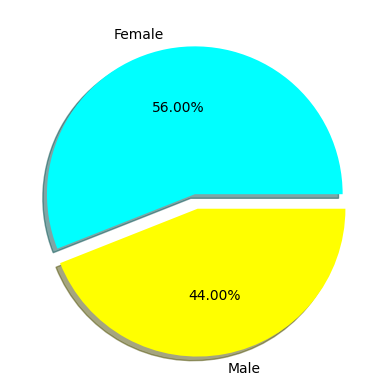

In [ ]:
s=pd.Series(df1['Gender']).value_counts()
colors=['cyan','yellow']
plt.pie(s,labels=['Female','Male'],colors = colors, explode = [0, 0.1], shadow = True, autopct = '%.2f%%')
plt.show()

In [ ]:
df1.groupby(df1['Gender']).mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


### Check Missing Values

In [ ]:
n=df1.isnull().sum()
n

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

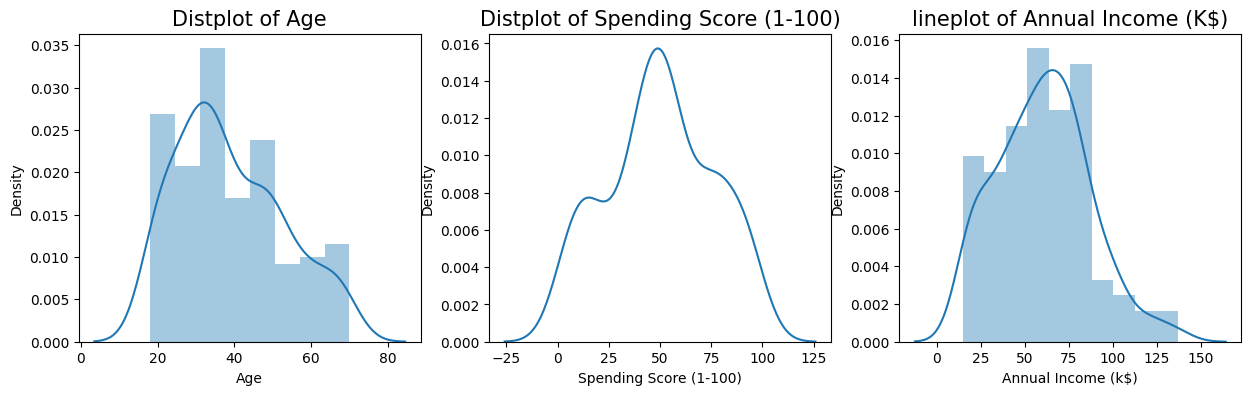

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
sns.distplot(df1['Age'],ax=axes[0])
axes[0].set_title('Distplot of Age',fontsize=15)
axes[0].set_xlabel('Age',fontsize=10)
sns.distplot(df1['Spending Score (1-100)'],ax=axes[1],hist=False)
axes[1].set_title('Distplot of Spending Score (1-100)',fontsize=15)
axes[1].set_xlabel('Spending Score (1-100)',fontsize=10)
sns.distplot(df1['Annual Income (k$)'],ax=axes[2])
axes[2].set_title('lineplot of Annual Income (K$)',fontsize=15)
axes[2].set_xlabel('Annual Income (k$)',fontsize=10)
plt.show()

# Pairplot for the Data

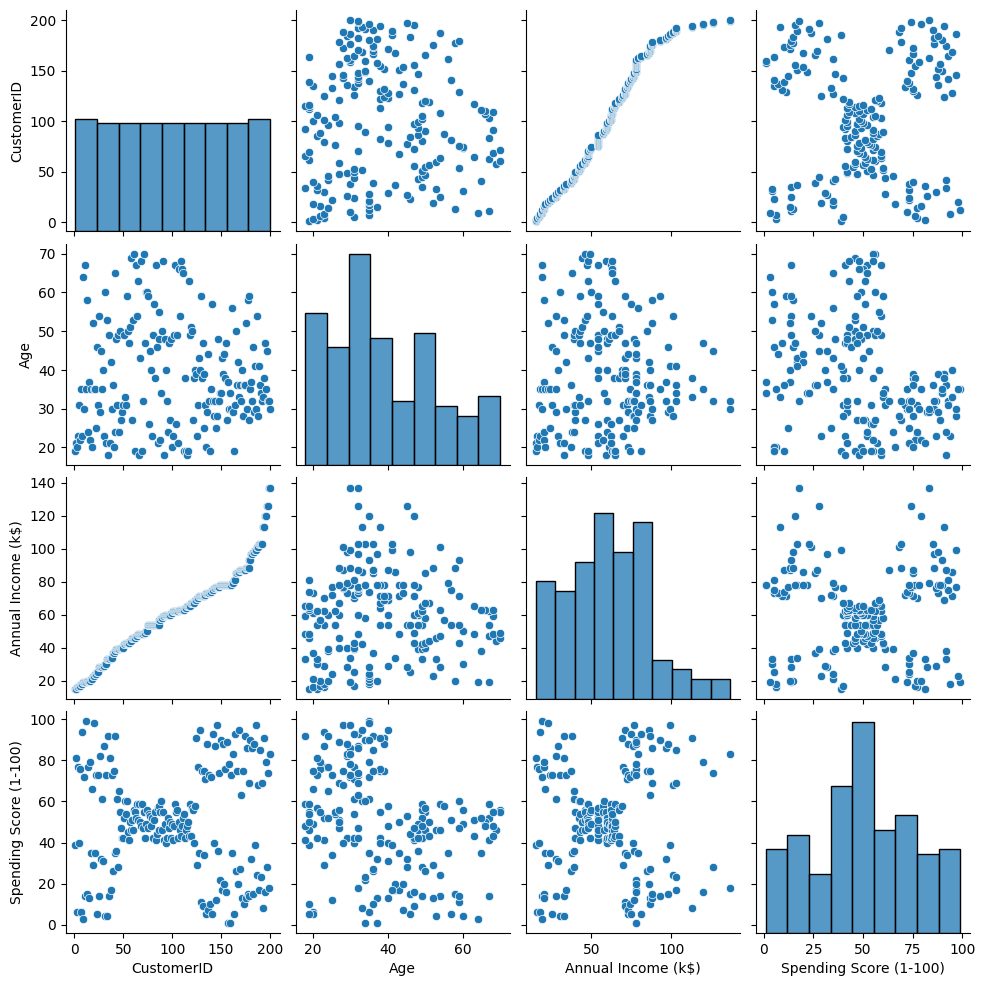

In [ ]:
sns.pairplot(df1)
plt.show()

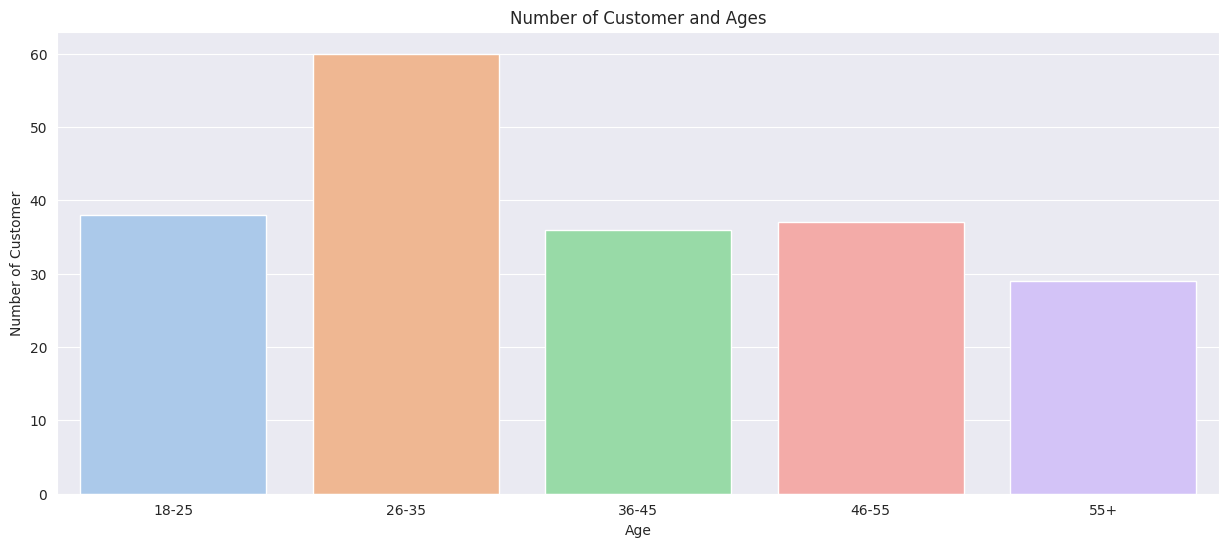

In [ ]:
age18_25 = df1.Age[(df1.Age <= 25) & (df1.Age >= 18)]
age26_35 = df1.Age[(df1.Age <= 35) & (df1.Age >= 26)]
age36_45 = df1.Age[(df1.Age <= 45) & (df1.Age >= 36)]
age46_55 = df1.Age[(df1.Age <= 55) & (df1.Age >= 46)]
age55above = df1.Age[df1.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y,palette="pastel")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

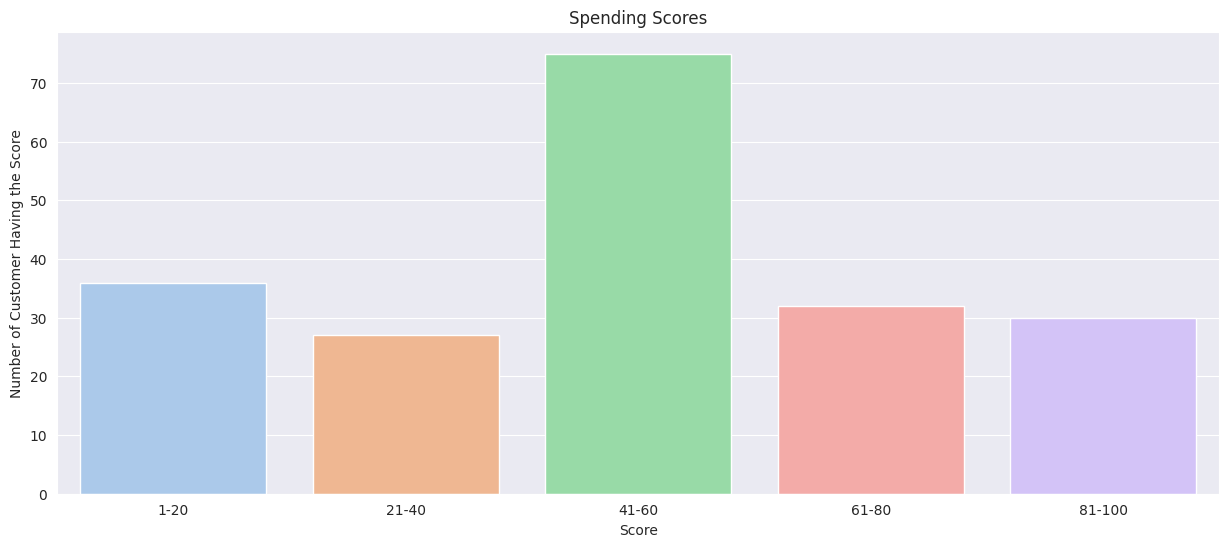

In [ ]:
s1 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 1) & (df1["Spending Score (1-100)"] <= 20)]
s2 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 21) & (df1["Spending Score (1-100)"] <= 40)]
s3 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 41) & (df1["Spending Score (1-100)"] <= 60)]
s4= df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 61) & (df1["Spending Score (1-100)"] <= 80)]
s5 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 81) & (df1["Spending Score (1-100)"] <= 100)]

s = ["1-20", "21-40", "41-60", "61-80", "81-100"]
sl = [len(s1.values), len(s2.values), len(s3.values), len(s4.values), len(s5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=s, y=sl,palette="pastel")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

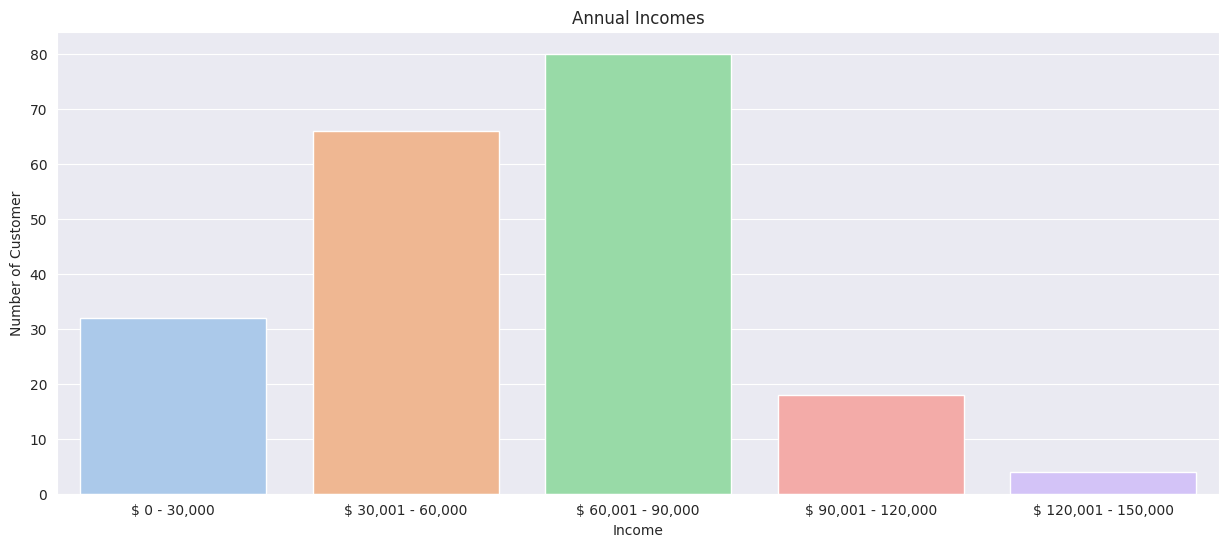

In [ ]:
a1 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 0) & (df1["Annual Income (k$)"] <= 30)]
a2 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 31) & (df1["Annual Income (k$)"] <= 60)]
a3 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 61) & (df1["Annual Income (k$)"] <= 90)]
a4 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 91) & (df1["Annual Income (k$)"] <= 120)]
a5 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 121) & (df1["Annual Income (k$)"] <= 150)]

a = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
al = [len(a1.values), len(a2.values), len(a3.values), len(a4.values), len(a5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=a, y=al, palette="pastel")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# K-Means

K-means clustering is a type of unsupervised learning which is used when you have unlabeled data. By using this algorithm you will try to find groups in the data. "k" value represent number of groups.

Now we will try to find what "k" value we should use. We will find out it with "elbow method".

In [ ]:
X=df1.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

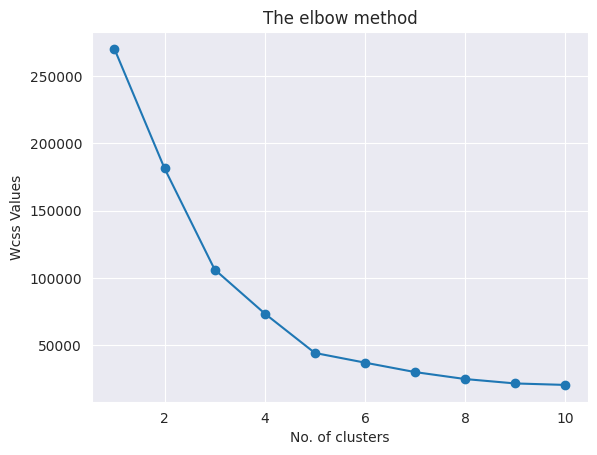

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Wcss Values')
plt.show()

# Visualizing all cluster

When we use elbow method in the above we may say 5 will be our number of cluster. Let's use K-Means and see how our plot will look like.

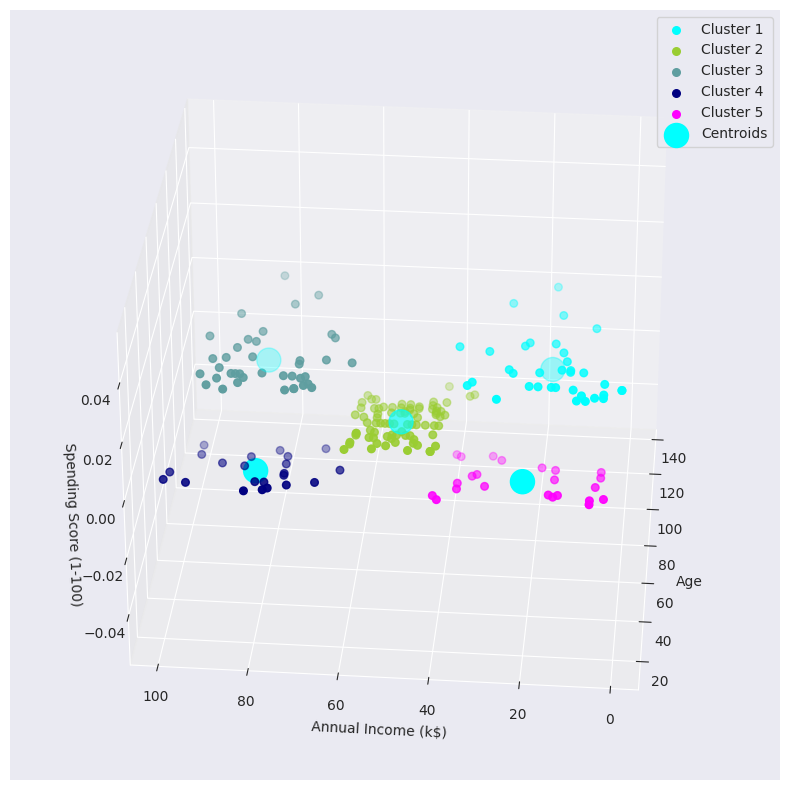

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(15,9))
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'aqua', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'yellowgreen', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'cadetblue', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'navy', label = 'Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

We have 5 type of customer and we grouped them as you can see above.